In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'whitegrid')

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [3]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
null_col = (training_data.isnull().sum()/len(training_data)) * 100
null_col = null_col.sort_values(ascending=False)
null_col

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
                   ...    
CentralAir        0.000000
SaleCondition     0.000000
Heating           0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 81, dtype: float64

In [6]:
corr = training_data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
train_data = training_data.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF',
                                 'YrSold','OverallCond','MSSubClass','EnclosedPorch','GarageType',
                                 'KitchenAbvGr','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','SalePrice'], axis = 1)

test_data = testing_data.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','Id','LowQualFinSF',
                                 'YrSold','OverallCond','MSSubClass','EnclosedPorch','GarageType',
                                 'KitchenAbvGr','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1)

In [8]:
categorical_features = train_data.select_dtypes(include = ["object"]).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
numerical_features = train_data.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold'],
      dtype='object')

#VISUALIZATION 

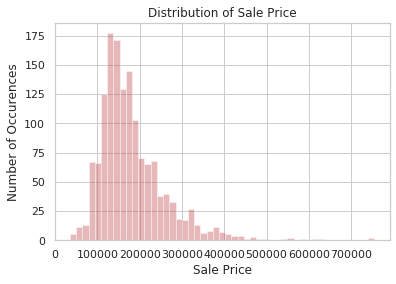

In [10]:
sns.distplot(training_data['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

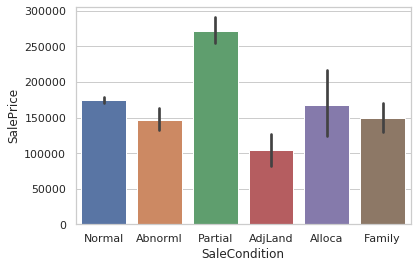

In [11]:
sns.barplot(x='SaleCondition', y='SalePrice', data=training_data)

Text(0.5, 0, 'Total Basement in Square Feet')

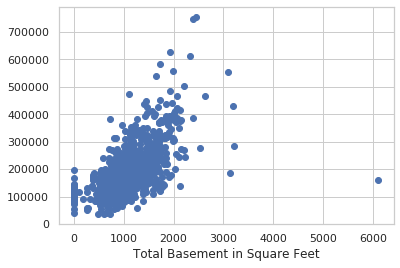

In [12]:
plt.scatter(x ='TotalBsmtSF', y = 'SalePrice', data = training_data)
plt.xlabel('Total Basement in Square Feet')

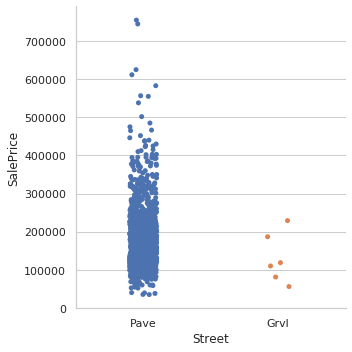

In [13]:
sns.catplot(x ='Street', y = 'SalePrice', data = training_data)

In [14]:
GarageCondM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
train_data['GarageCond'] = train_data['GarageCond'].map(GarageCondM)

GarageQualM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
train_data['GarageQual'] = train_data['GarageQual'].map(GarageQualM)

GarageFinishM = {'RFn':0, 'Unf':1}
train_data['GarageFinish'] = train_data['GarageFinish'].map(GarageFinishM) 

BsmtFinType2M = {'Unf':0, 'BLQ':1, 'ALQ':2, 'Rec':3, 'LwQ':4, 'GLQ':5}
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map(BsmtFinType2M) 

BsmtExposureM = {'No':0, 'Gd':1, 'Mn':2, 'Av':3}
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(BsmtExposureM) 

BsmtCondM = {'TA':0, 'Fa':1, 'Gd':2}
train_data['BsmtCond'] = train_data['BsmtCond'].map(BsmtCondM)

BsmtQualM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
train_data['BsmtQual'] = train_data['BsmtQual'].map(BsmtQualM)

BsmtFinType1M = {'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'LwQ':5}
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map(BsmtFinType1M)

MasVnrTypeM = {'BrkFace':0, 'None':1, 'Stone':2, 'BrkCmn':3, 'BLQ':4, 'LwQ':5}
train_data['MasVnrType'] = train_data['MasVnrType'].map(MasVnrTypeM)

ElectricalM = {'SBrkr':0, 'FuseA':1, 'FuseF':2, 'BrkCmn':3, 'BLQ':4, 'LwQ':5}
train_data['Electrical'] = train_data['Electrical'].map(ElectricalM)

In [15]:
GarageCondM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
test_data['GarageCond'] = test_data['GarageCond'].map(GarageCondM)

GarageQualM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
test_data['GarageQual'] = test_data['GarageQual'].map(GarageQualM)

GarageFinishM = {'RFn':0, 'Unf':1}
test_data['GarageFinish'] = test_data['GarageFinish'].map(GarageFinishM) 

BsmtFinType2M = {'Unf':0, 'BLQ':1, 'ALQ':2, 'Rec':3, 'LwQ':4, 'GLQ':5}
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].map(BsmtFinType2M) 

BsmtExposureM = {'No':0, 'Gd':1, 'Mn':2, 'Av':3}
test_data['BsmtExposure'] = test_data['BsmtExposure'].map(BsmtExposureM) 

BsmtCondM = {'TA':0, 'Fa':1, 'Gd':2}
test_data['BsmtCond'] = test_data['BsmtCond'].map(BsmtCondM)

BsmtQualM = {'TA':0, 'Fa':1, 'Gd':2, 'Ex':3}
test_data['BsmtQual'] = test_data['BsmtQual'].map(BsmtQualM)

BsmtFinType1M = {'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'LwQ':5}
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].map(BsmtFinType1M)

MasVnrTypeM = {'BrkFace':0, 'None':1, 'Stone':2, 'BrkCmn':3, 'BLQ':4, 'LwQ':5}
test_data['MasVnrType'] = test_data['MasVnrType'].map(MasVnrTypeM)

ElectricalM = {'SBrkr':0, 'FuseA':1, 'FuseF':2, 'BrkCmn':3, 'BLQ':4, 'LwQ':5}
test_data['Electrical'] = test_data['Electrical'].map(ElectricalM)

In [16]:
train_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,Y,0,61,0,0,0,2,WD,Normal
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.0,Y,298,0,0,0,0,5,WD,Normal
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,Y,0,42,0,0,0,9,WD,Normal
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0.0,Y,0,35,0,0,0,2,WD,Abnorml
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0.0,Y,192,84,0,0,0,12,WD,Normal


In [17]:
train_data.to_csv('New.csv')

In [18]:
train_data['GarageCond'].value_counts()

0.0    1326
1.0      35
2.0       9
3.0       2
Name: GarageCond, dtype: int64

In [19]:
train_data = train_data.fillna(train_data.mean())
train_data = pd.DataFrame(train_data)

test_data = test_data.fillna(test_data.mean())
test_data = pd.DataFrame(test_data)
train_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,Y,0,61,0,0,0,2,WD,Normal
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.0,Y,298,0,0,0,0,5,WD,Normal
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,Y,0,42,0,0,0,9,WD,Normal
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0.0,Y,0,35,0,0,0,2,WD,Abnorml
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0.0,Y,192,84,0,0,0,12,WD,Normal


In [20]:
train_data.to_csv('New2.csv')

In [21]:
train_data['GarageCond'].value_counts()

0.000000    1326
0.043003      88
1.000000      35
2.000000       9
3.000000       2
Name: GarageCond, dtype: int64

In [22]:
train_data['train'] = 1
test_data['test'] = 0
combined = pd.concat([train_data, test_data])
combined = pd.get_dummies(combined, prefix_sep='_', columns = list(categorical_features))
combined.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFullBath,BsmtUnfSF,Fireplaces,FullBath,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,854,0,3,706.0,1.0,150.0,0,2,548.0,...,0,0,0,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,284.0,1,2,460.0,...,0,0,0,1,0,0,0,0,1,0
2,920,866,0,3,486.0,1.0,434.0,1,2,608.0,...,0,0,0,1,0,0,0,0,1,0
3,961,756,0,3,216.0,1.0,540.0,1,1,642.0,...,0,0,0,1,1,0,0,0,0,0
4,1145,1053,0,4,655.0,1.0,490.0,1,2,836.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
train_data = combined[combined["train"] == 1]
test_data = combined[combined["test"] == 0]
train_data.drop(["test","train"], axis = 1, inplace = True)
test_data.drop(["train","test"], axis = 1, inplace = True)

/home/rutvik/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
categorical_features = train_data.select_dtypes(include = ["object"]).columns
categorical_features

Index([], dtype='object')

In [25]:
categorical_features = test_data.select_dtypes(include = ["object"]).columns
categorical_features

Index([], dtype='object')

In [26]:
null_col = (train_data.isnull().sum()/len(train_data)) * 100
null_col = null_col.sort_values(ascending=False)
null_col

SaleCondition_Partial    0.0
Condition1_RRAn          0.0
BldgType_Twnhs           0.0
BldgType_Duplex          0.0
BldgType_2fmCon          0.0
                        ... 
BsmtQual_0.0             0.0
Foundation_Wood          0.0
Foundation_Stone         0.0
Foundation_Slab          0.0
1stFlrSF                 0.0
Length: 269, dtype: float64

In [27]:
null_col = (test_data.isnull().sum()/len(test_data)) * 100
null_col = null_col.sort_values(ascending=False)
null_col

SaleCondition_Partial    0.0
Condition1_RRAn          0.0
BldgType_Twnhs           0.0
BldgType_Duplex          0.0
BldgType_2fmCon          0.0
                        ... 
BsmtQual_0.0             0.0
Foundation_Wood          0.0
Foundation_Stone         0.0
Foundation_Slab          0.0
1stFlrSF                 0.0
Length: 269, dtype: float64

In [28]:
X_train = train_data.copy()
Y_train = training_data["SalePrice"].values
X_test = test_data.copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 269), (1460,), (1459, 269))

In [29]:
from sklearn.linear_model import LinearRegression, RidgeCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 7, 8, 9, 10, 30, 60])
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Trying again for more precision alpha values " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)

ridge_fit = ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
ridge_predictions = ridge.predict(X_test)

Best alpha : 8.0
Trying again for more precision alpha values 8.0
Best alpha : 11.2


In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter = 5000, alpha = 11.2)
lasso_fit = lasso.fit(X_train, Y_train)
lasso_predictions = lasso.predict(X_test)

In [31]:
import xgboost as xgb
gbm = xgb.XGBRegressor(
                 colsample_bytree=0.1,   #ratio_of_constructing_each_tree
                 gamma=0.0,              #loss_reduction_param
                 learning_rate=0.01,     #for_updating_param
                 max_depth=3,            #maximum_depth_of_tree
                 min_child_weight=0,     #minimum_sum_of_child_weight
                 n_estimators=10000,     #total_no_of_iterations                                                                   
                 reg_alpha=0.0006,       #updating_coefficient_L1_regularization_term
                 reg_lambda=0.6,         #updating_coefficient_L2_regularization_term
                 subsample=0.7,          #sampling_training_data_randomly
                 seed=30,                #random_number_seed
                 silent=1)               #occurence_of_message
gbm_fit = gbm.fit(X_train, Y_train)
gbm_predictions = gbm.predict(X_test)

In [32]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(objective='regression',     
                        num_leaves=5,                  #num_of_leaves in a tree
                        learning_rate=0.05,            #updating_weights_to_mimize_loss
                        n_estimators=5000,             #num_of_iterations
                        max_bin = 55,                  #num_of_bins_binning_refers_to_continous_unique_value
                        bagging_fraction = 0.8,        #select_random_data_samples
                        bagging_freq = 5,              #perform_bagging_at_k_iteration
                        feature_fraction = 0.2319,     #randomly_select_feature_here_23%
                        feature_fraction_seed=9,       #random_seed_for_feature_fraction
                        bagging_seed=9,                #random_seed_for_bagging
                        min_data_in_leaf =6,           #minimum_no_leaf
                        min_sum_hessian_in_leaf = 11)
lgb = lgb.fit(X_train, Y_train)
lgb_predictions = lgb.predict(X_test)

In [33]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(lgb,lasso,ridge),
                                meta_regressor=gbm,
                                use_features_in_secondary=True)

In [34]:
stack_gen.fit(X_train, Y_train)

/home/rutvik/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/rutvik/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/rutvik/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/rutvik/.local/lib/python3.6/site-packages/sklearn/model_selection/_search

StackingCVRegressor(cv=5,
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.1, gamma=0.0,
                                                importance_type='gain',
                                                learning_rate=0.01,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=0,
                                                missing=None,
                                                n_estimators=10000, n_jobs=1,
                                                nthread=None,
                                                objective='reg:linear',
                                                random_state=0,
 

In [35]:
stack_pred = stack_gen.predict(X_test)

In [36]:
stack_pred

array([123574.484, 164189.19 , 189086.03 , ..., 153710.58 , 118715.66 ,
       204167.47 ], dtype=float32)

In [38]:
stack = pd.DataFrame({
        "Id": testing_data["Id"],
        "SalePrice": stack_pred
    })
stack.to_csv('stack_submissison.csv', index=False)

In [43]:
best = pd.read_csv('best_submission.csv')
blend = lgb_predictions*0.50+best.SalePrice.values*0.50
blend

array([121981.12096453, 165903.05375851, 185779.55559104, ...,
       163678.52477619, 115870.08002849, 217931.38927256])

In [44]:
submission = pd.DataFrame({
        "Id": testing_data["Id"],
        "SalePrice": blend
    })
submission.to_csv('final_submissison5.csv', index=False)

In [ ]:
submission.head()